In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
kafka_df = pd.read_csv('data_6k_kafka_with_latency.csv')
nats_df = pd.read_csv('data_6k_nats_with_latency.csv')

print(len(kafka_df))
print(len(nats_df))

5757095
5786761


In [10]:
# Tambahkan label untuk membedakan dataset
kafka_df['System'] = 'Kafka'
nats_df['System'] = 'NATS'

In [11]:
# Gabungkan kedua DataFrame
combined_df = pd.concat([kafka_df, nats_df])

In [12]:
print(combined_df.head())

                        _id      createdAt  receivedByConsumerAt  \
0  66a25a8acc231e36bb374e80  1721916042643         1721916042595   
1  66a25a8bcc231e36bb374e81  1721916043179         1721916043179   
2  66a25a8bcc231e36bb374e82  1721916043186         1721916043185   
3  66a25a8bcc231e36bb374e83  1721916043194         1721916043193   
4  66a25a8bcc231e36bb374e84  1721916043204         1721916043204   

   sentFromBrokerAt  updatedAt  e2eLatency System  
0     1721916041956          0         639  Kafka  
1     1721916041955          0        1224  Kafka  
2     1721916041955          0        1230  Kafka  
3     1721916041956          0        1237  Kafka  
4     1721916041955          0        1249  Kafka  


In [15]:
# Pastikan kolom latency sudah dalam format numerik
combined_df['e2eLatency'] = pd.to_numeric(combined_df['e2eLatency'], errors='coerce')

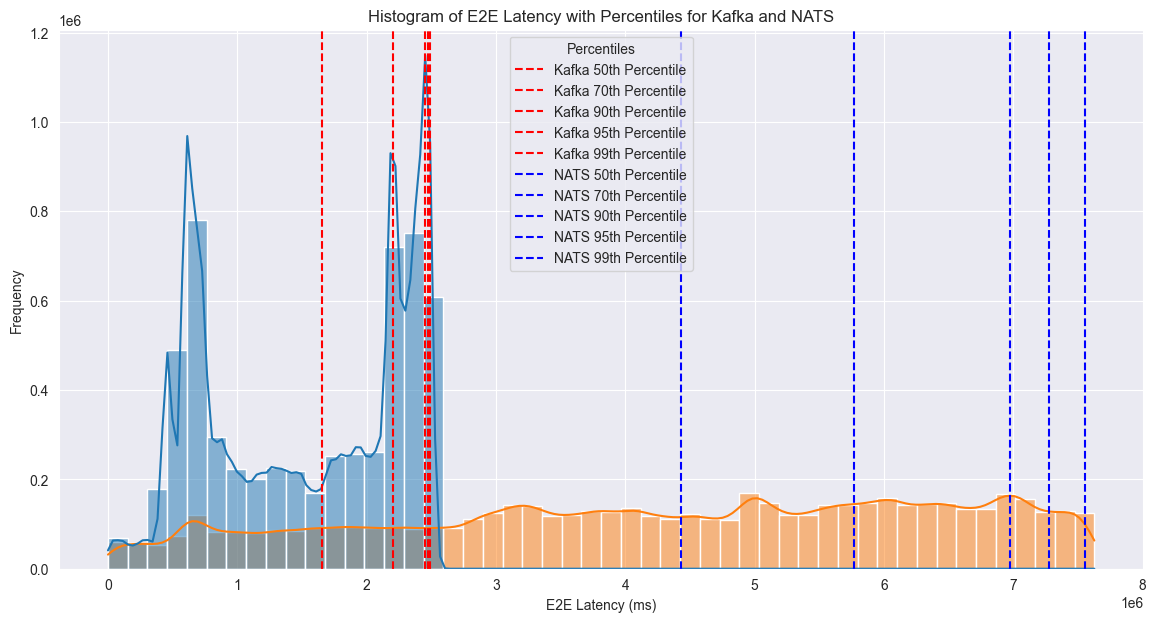

Percentile Summary:
             0.50       0.70       0.90       0.95       0.99
System                                                       
Kafka   1656574.0  2204810.0  2449112.0  2475627.0  2486733.0
NATS    4427779.0  5767660.0  6975409.0  7276836.0  7555790.0


In [21]:
# Menghitung persentil
percentiles = combined_df.groupby('System')['e2eLatency'].quantile([0.50, 0.70, 0.90, 0.95, 0.99]).unstack()

# Membuat plot
plt.figure(figsize=(14, 7))

# Plot histogram
sns.histplot(data=combined_df, x='e2eLatency', hue='System', bins=50, kde=True)

# Menambahkan garis vertikal untuk persentil
for system in ['Kafka', 'NATS']:
    for p in [0.50, 0.70, 0.90, 0.95, 0.99]:
        plt.axvline(percentiles.loc[system, p], color='r' if system == 'Kafka' else 'b', linestyle='--', label=f'{system} {int(p*100)}th Percentile')

# Menambahkan label dan title
plt.title('Histogram of E2E Latency with Percentiles for Kafka and NATS')
plt.xlabel('E2E Latency (ms)')
plt.ylabel('Frequency')
plt.legend(title='Percentiles')
plt.grid(True)
plt.show()

# Menampilkan tabel ringkasan persentil
print("Percentile Summary:")
print(percentiles)